In [4]:
# Fill in your name using the format below and student ID number
your_name = "Jonsson, Stefan"
student_id = "1499203"

In [5]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [6]:
# Uncomment the following line to run in Google Colab
#!pip install --quiet openml 

In [7]:
# Uncomment the following line to run in Google Colab
#%tensorflow_version 2.x
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

[]

In [8]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [9]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Tensorflow is outdated. This is version 2.0.0. Please update to 2.1.


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [10]:
#from google.colab import drive
#drive.mount('/content/drive')

In [11]:
#base_dir = '/content/drive/My Drive/Eindhoven/Data mining/assignment-3-StefanGunnlaugur' # For Google Colab
base_dir = '/Users/stefan/Documents/Tue/Year1/Q3/Web_information_retrieval_and_data_mining/assignment-3-StefanGunnlaugur'

In [12]:
#Uncomment to link Colab notebook to Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [13]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
#import os
#oml.config.cache_directory = os.path.expanduser('/content/cache')

In [14]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [15]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [16]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

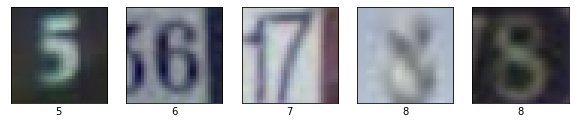

In [17]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

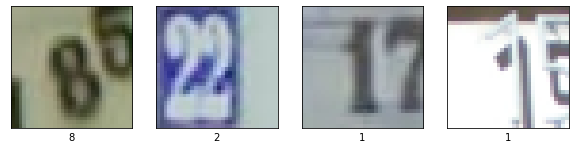

In [18]:
plot_images(X_test[0:4], y_test[0:4])

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [19]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
          shout("Model not found")
          return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
          shout("Learning curves not found")
          return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 30,840
Trainable params: 30,840
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  2.233210  0.190073  2.233099      0.190974
max  2.245437  0.190954  2.233124      0.190974


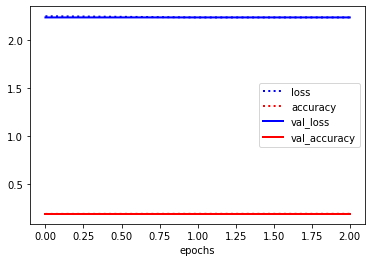

In [17]:
# Toy usage example
# Remove before submission
from tensorflow.keras import models
from tensorflow.keras import layers 

def build_toy_model():
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# First build and store
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=True, epochs=3, batch_size=32)

Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 30,840
Trainable params: 30,840
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  2.233210  0.190073  2.233099      0.190974
max  2.245437  0.190954  2.233124      0.190974


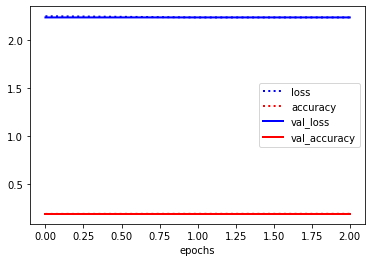

In [18]:
# Toy usage example
# Remove before submission
# With train=False: load from file and report the same results without rerunning
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=False)

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)        

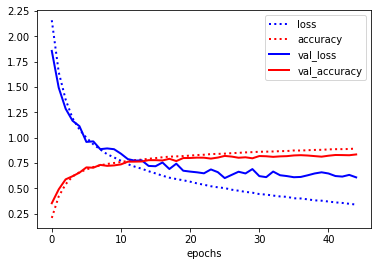

In [19]:
from tensorflow.keras import layers
from tensorflow.keras import models

def build_model_1_1():

  model = models.Sequential()
  model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='adamax',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=False, epochs=45, batch_size=32)
answer_q_1_1 = """
The model is made of 7 dense layers, first one of size 512, then smaller and smaller. 
I used adamax as the optimizer. I tried a some different variations like adam and rmsprop 
but this worked best. Relu is used as activation for all layers but the last where softmax
is used for classification output. The accuracy gets up to about 89% on the training data
but only 83% on the validation set so there is a bet of overfitting.
               """
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [20]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

In [21]:
preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val
print(X_train.shape)
print(preprocessed_split[0].shape)

(63544, 32, 32, 3)
(63544, 32, 32, 1)


Loading model from file
Success!
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)     

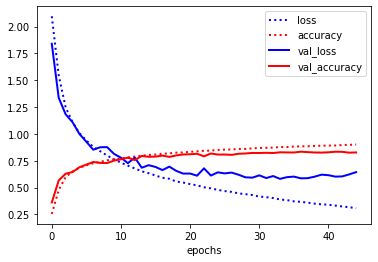

In [22]:
# Replace with the preprocessed data
#preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val

# Adjusted model
def build_model_1_2():
  model = models.Sequential()
  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='adamax',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=False, epochs=45, batch_size=32)
answer_q_1_2 = """
The results are fairly similar here, perhaps just a touch more accurate.
We use the grayscale to avoid false false classification and 
lower complexities. There should be no information lost by stripping the
colors, so this only simplifies the data. There is still a bit of overfitting
but it is not a dealbreaker. The model is starting to increse it's loss
so it is advisable to stop training there or perhaps a bit earlier.
               """
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Loading model from file
Success!
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_20 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_22 (Dense)     

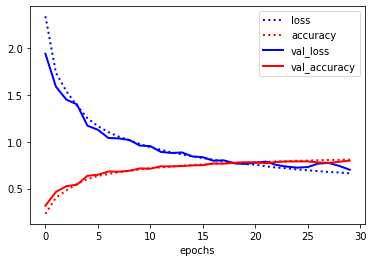

In [23]:
from tensorflow.keras.layers import Dropout

optimizerAdam = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)

optimizerAdamax= tf.keras.optimizers.Adamax(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Adamax'
)

def build_model_1_3():
  model = models.Sequential()
  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  #model.add(Dropout(0.2))
  #, kernel_regularizer=tensorflow.keras.regularizers.l2(l=0.001)
  model.add(layers.Dense(512, activation='relu'))
  #model.add(Dropout(0.2))
  model.add(layers.Dense(256, activation='relu'))
  #model.add(Dropout(0.2))
  model.add(layers.Dense(128, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l1(l=0.001)))
  model.add(Dropout(0.2))
  model.add(layers.Dense(64, activation='relu'))
  #model.add(Dropout(0.2))
  model.add(layers.Dense(32, activation='relu'))
  #model.add(Dropout(0.2))
  model.add(layers.Dense(16, activation='relu'))
  #model.add(Dropout(0.2))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer= 'adamax',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=False, epochs=30, batch_size=32)
answer_q_1_3 = """
I tried alot of different regulation combinations using dropout and 
regularizers on the dense layers. None of them improved the accuracy.
It did reduce overfitting but did so at the expence of the traning and 
validation accuracy. It brought the training and validation accuracy 
down to about 80%, using just a bit of regulation. When I used more 
regulation the accuracy was brought down to about 20%-50%.
               """
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Loading model from file
Success!
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxP

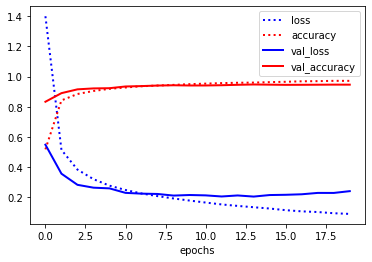

In [24]:
def build_model_2_1():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  #model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
  #model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
  #model.add(layers.MaxPooling2D((2, 2)))
  #model.add(layers.Dropout(0.2))
  model.add(layers.Flatten())
  #model.add(layers.Dense(256, activation='relu'))
  #model.add(layers.Dropout(0.2))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.2))
  #model.add(layers.Dense(64, activation='relu'))
  #model.add(layers.Dropout(0.2))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='adamax',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model
run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=False, epochs=20, batch_size=32)
answer_q_2_1 = """
I tried a range of model complexities and landed somwhere in the middle. 
Making it much more complex didn't help much with accuracy. This is also 
not too simple and has a well known structure to it, yielding good 
accuracy in only 20 epocs. Training accuracy is 97% and validation 
is around 95%. The model is made of 3 conv layer blocks, each block 
consists of two Conv2D layers growing in size with each block. There is a
MaxPooling layer then a dropout layer for regularization. After the convolutional
blocks there is a Flatten layer to transition to one hidden dence layer and 
then a Dense output layer. Adamax optimizer performed well.
               """
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=20,  
        zoom_range = 0.1, 
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        )

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(preprocessed_split[0])



Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPoo

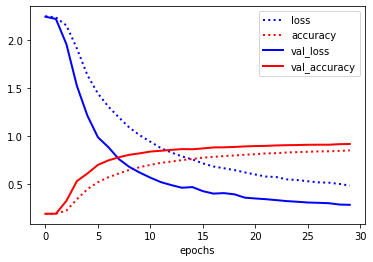

In [26]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data

augmented_split = datagen.flow(preprocessed_split[0], preprocessed_split[2], batch_size=1024), preprocessed_split[1], preprocessed_split[3]
run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, generator=True,
               train=False, epochs=40, batch_size=None)
answer_q_2_2 = """
Shift rotations and zooming work well, flipping does not because it changes 
the image too much. The hyperparameters of the image generator dont matter
significally within reasonable range. The chosen values work fairly well. 
The validation accuracy is around 92% and the training accuracy is about 85%. 
This probably indicates some underfitting.
               """
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

In [27]:
greyTest = rgb2gray(X_test)
model_3_1 = load_model_from_file(base_dir, 'model_2_2', extension='.h5')
loss, acc = model_3_1.evaluate(greyTest, y_test, batch_size=32)

19858/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

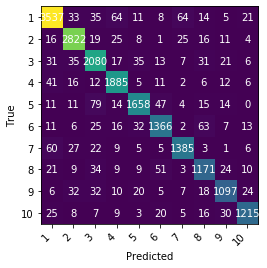

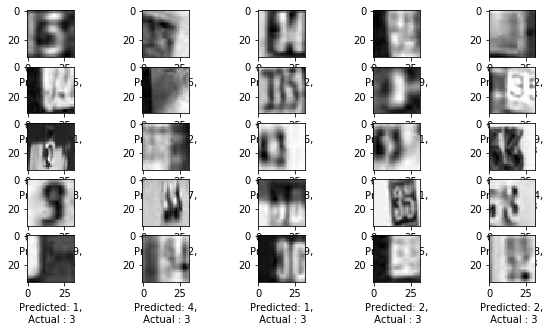

Answer is 488 characters long


In [28]:
from sklearn.metrics import confusion_matrix

test_accuracy_3_1 = acc

y_pred = model_3_1.predict(greyTest)
misclassified_samples = np.nonzero(np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1))[0]

def plot_confusion_matrix():
  cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
  fig, ax = plt.subplots()
  im = ax.imshow(cm)
  ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
  ax.set_xticklabels(list(range(1, 12)), rotation=45, ha="right")
  ax.set_yticklabels(list(range(1, 12)))
  ax.set_ylabel('True')
  ax.set_xlabel('Predicted')
  for i in range(100):
      ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

plot_confusion_matrix()

d = [[] for x in range(10)]
for i in misclassified_samples:
  d[(range(1, 12)[np.argmax(y_test[i])])%10].append(i)
  
def plot_misclassifications():
  label = 3
  rows = 5
  cols = 5
  fig, axes = plt.subplots(rows, cols,  figsize=(10, 5))
  for j in range(rows):
    for nr, i in enumerate(d[label][j*cols:(j+1)*cols]):
      axes[j, nr].imshow(greyTest[i].squeeze(axis=2), cmap="gray")
      axes[j, nr].set_xlabel("Predicted: %s,\n Actual : %s" % (range(1, 12)[np.argmax(y_pred[i])],range(1, 12)[np.argmax(y_test[i])]))
      #axes[j, nr].set_xticks(()), axes[nr].set_yticks(())

  plt.show();

plot_misclassifications()

answer_q_3_1 = """
The matrix tells us that lower numbers are classified 
more correctly, if there are equal quantities of numbers. 
Some numbers are confused more together 
like 1 and 7, 5 and 3, 8 and 6. Looking at the
misclassified images of "3", some of them are so 
blurry they are compleatly illegable, some include other 
numbers to either side that the model classifies instead.
Some have shadows interfearing with the image.
Perhaps some are even wrongly classified in the dataset.
               """
print("Answer is {} characters long".format(len(answer_q_3_1)))

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

In [29]:
from tensorflow.keras import models

img_tensor = greyTest[0]
img_tensor = np.expand_dims(img_tensor, axis=0) 

model_3_2 = load_model_from_file(base_dir, 'model_2_2', extension='.h5')

layer_outputs = [layer.output for layer in model_3_2.layers[:15]]

activation_model = models.Model(inputs=model_3_2.input, outputs=layer_outputs)


activations = activation_model.predict(img_tensor)

['conv2d', 'conv2d_1', 'max_pooling2d', 'dropout', 'conv2d_2', 'conv2d_3', 'max_pooling2d_1', 'dropout_1', 'conv2d_4', 'conv2d_5', 'max_pooling2d_2', 'dropout_2', 'flatten', 'dense', 'dropout_3', 'dense_1']


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


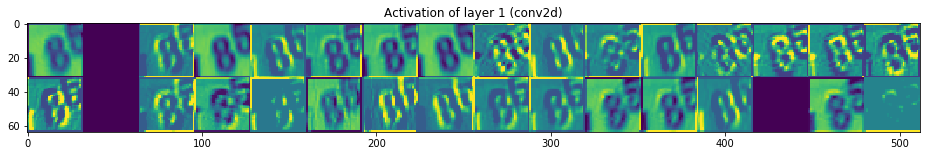

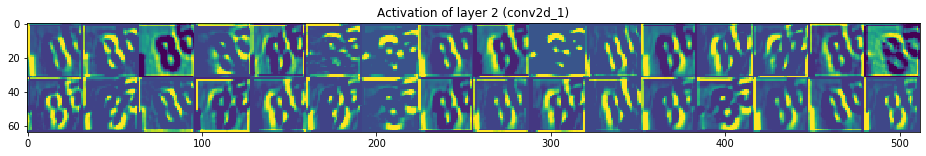

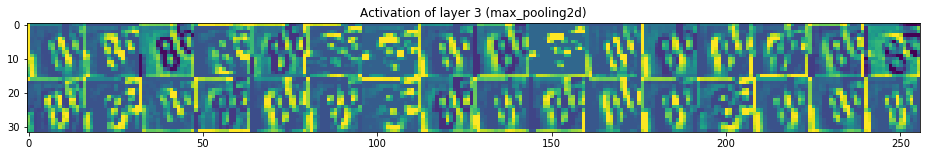

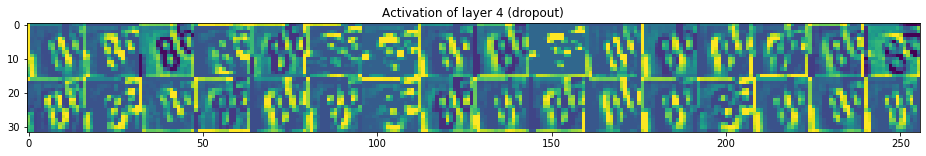

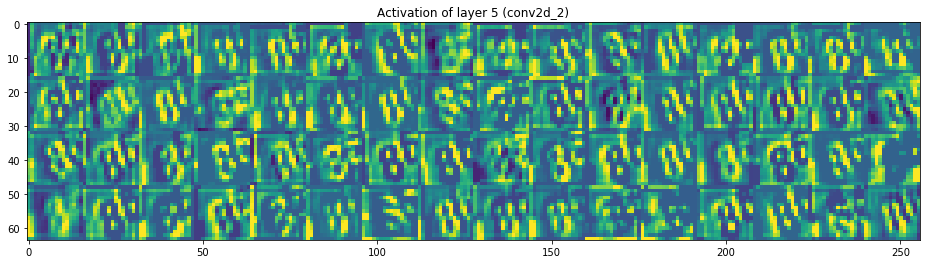

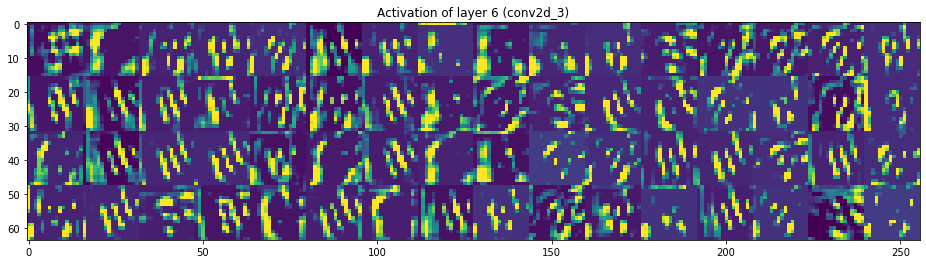

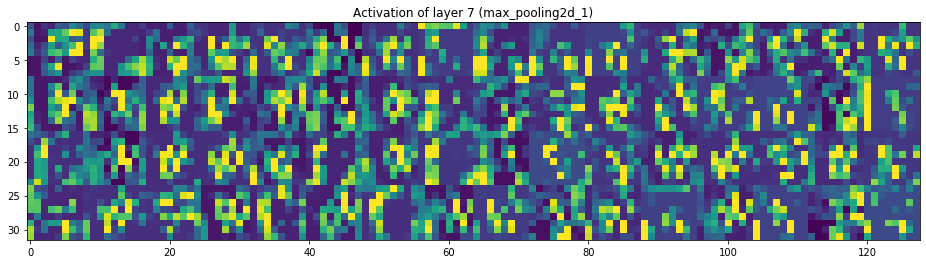

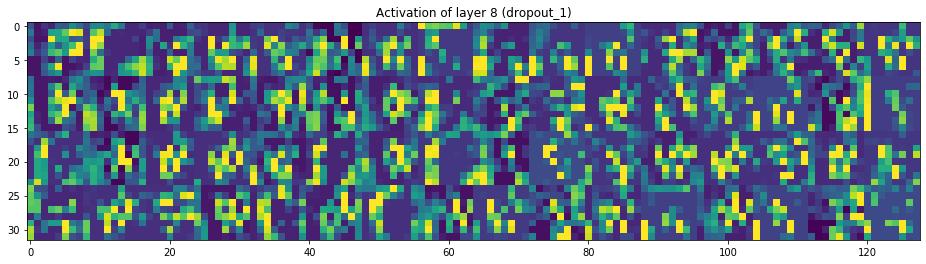

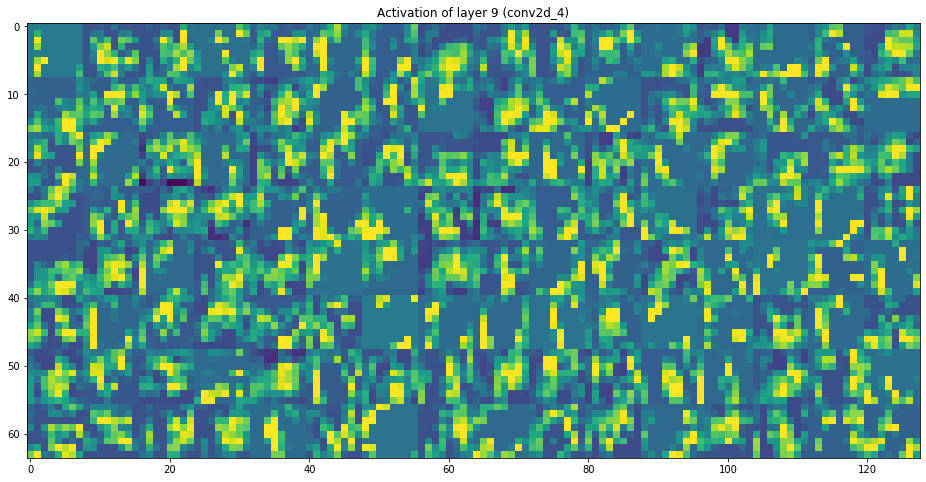

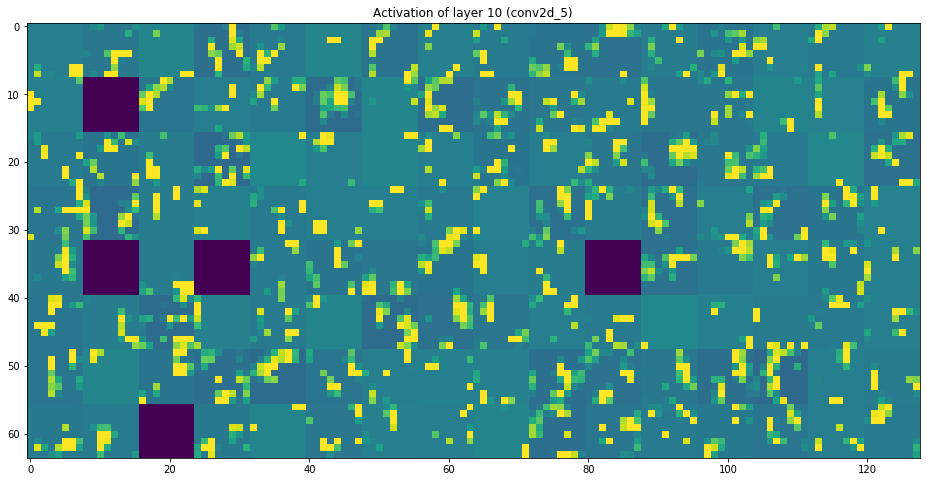

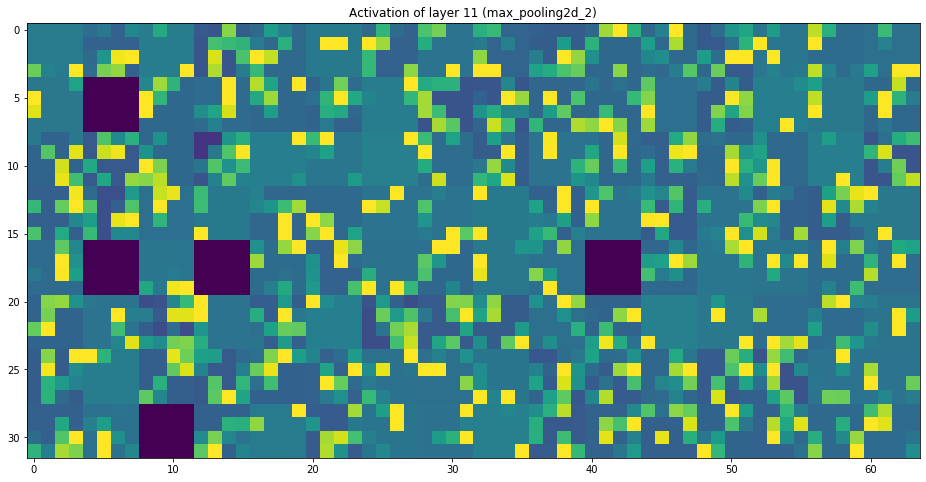

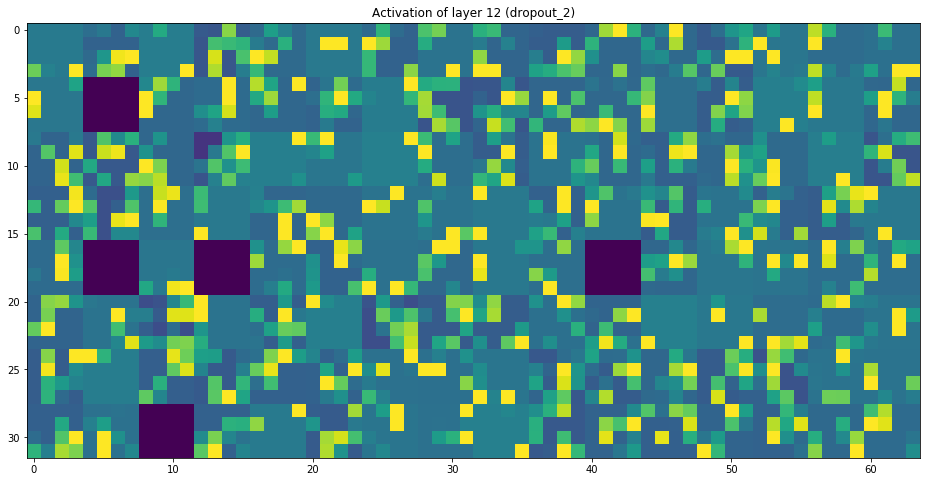

Answer is 492 characters long


In [30]:
images_per_row = 16

layer_names = []
for layer in model_3_2.layers:
    layer_names.append(layer.name)
print(layer_names)

def plot_activations():
    for layer_index in range(12):
        start = layer_index
        end = layer_index+1
        for layer_name, layer_activation in zip(layer_names[start:end], activations[start:end]):
          n_features = layer_activation.shape[-1]

          size = layer_activation.shape[1]

          n_cols = n_features // images_per_row
          display_grid = np.zeros((size * n_cols, images_per_row * size))

          for col in range(n_cols):
              for row in range(images_per_row):
                  channel_image = layer_activation[0,
                                                    :, :,
                                                    col * images_per_row + row]
                  channel_image -= channel_image.mean()
                  channel_image /= channel_image.std()
                  channel_image *= 64
                  channel_image += 128
                  channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                  display_grid[col * size : (col + 1) * size,
                                row * size : (row + 1) * size] = channel_image

          scale = 1. / size
          plt.figure(figsize=(scale * display_grid.shape[1],
                              scale * display_grid.shape[0]))
          plt.title("Activation of layer {} ({})".format(layer_index+1,layer_name))
          plt.grid(False)
          plt.imshow(display_grid, aspect='auto', cmap='viridis')

        plt.show()


plot_activations()

answer_q_3_2 = """
First three layers detect edges, outlines and backgrounds. 
Layers 4-5 become a bit more abstract, the 8 is still visable but the 
focus is more ambigous, perhaps the holes in the eight. On layer 6 the 
focus is on vertical lines, tilting left. The following layers are 
abstract and messy, looking at differennt part of the image and 
various shapes, some are missing filter-activations because the
input image does not have the information that the filter is interested in.
               """
print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


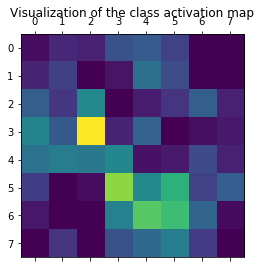

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


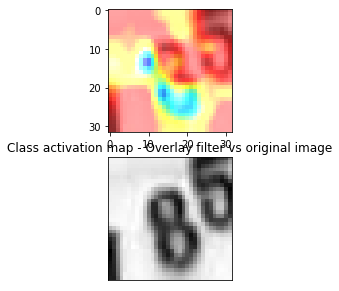

In [31]:
import cv2
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
tf.compat.v1.disable_eager_execution()
K.clear_session()

def plot_3_3():
  model_3_3 = load_model_from_file(base_dir, 'model_2_2')
  img_tensor = greyTest[0]
  img_tensor = np.expand_dims(img_tensor, axis=0) 
  x = img_tensor
  output = model_3_3.output[:,7]
  last_conv_layer = model_3_3.get_layer('conv2d_5')
  grads = K.gradients(output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model_3_3.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(128):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  plt.matshow(heatmap)
  plt.title('Visualization of the class activation map')
  plt.show()

  img = greyTest[0]
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = (heatmap * 0.003) + img
  fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(10, 5))
  plt.rcParams['figure.dpi'] = 120

  ax1.imshow(superimposed_img)
  ax2.imshow(img.squeeze(axis=2), cmap="gray")

  plt.title('Class activation map - Overlay filter vs original image')
  plt.xticks([])
  plt.yticks([])
  plt.show()

plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

Loading model from file
Success!
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_19 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 10)                2570      
Total params: 14,848,586
Trainable params: 4,853,514
Non-trainable params: 9,995,072
_________________________________________________________________
None
         loss       acc  val_loss   val_acc
min  0.036513  0.4

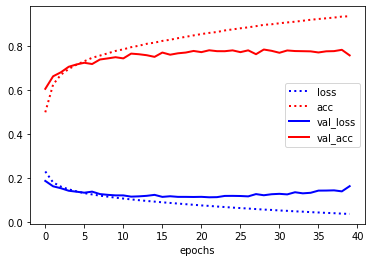

In [23]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout

from keras import optimizers

def build_model_4_1():

  conv_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(32, 32, 3))

  model = models.Sequential()
  model.add(conv_base)
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(Dropout(0.2))
  model.add(layers.Dense(10, activation='sigmoid'))
  #1986/1986 [==============================] - 42s 21ms/step - loss: 0.2246 - acc: 0.5075 - val_loss: 0.2265 - val_acc: 0.5005
  
  conv_base.trainable = True
  
  set_trainable = False

  for layer in conv_base.layers:
    if layer.name == 'block5_conv2':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

  #model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])
  return model

run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, 
               train=False, epochs=30, batch_size=32)
answer_q_4_1 = """
After VGG16 I added hidden dense layer, a dropout layer to 
reduce overfitting, then output layer. learning rate is small.
When the conv part is frozen the accuracy climbs
to around 50%. When the last two conv layers are unfrozen the acc quickly
climbs. At about 75% the model starts to overfit and the val-acc
never climbs higher than 79%. The training acc can grow to >93%.
First I unfroze 3 conv layer, that worked well, still some overfitting.
That was 118MB and could not be uploaded.
"""
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [21]:
import pickle
import gzip
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
import time 
from sklearn.model_selection import GridSearchCV


def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings():
  """ Stores all necessary embeddings to file
  """
  print("Storing...")
  model_4_2 = load_model_from_file(base_dir, 'model_4_1')
  conv_base = model_4_2.layers[0]
  #preds_train = conv_base.predict(X_train[0:int(len(X_train)*0.05)])
  #preds_test = conv_base.predict(X_val[0:int(len(X_val)*0.05)])
  preds_train = conv_base.predict(X_train)
  preds_test = conv_base.predict(X_test)
  temp = []
  for i in range(len(preds_train)):
    temp.append(preds_train[i][0][0])
  store_embedding(temp, 'embeddings_4_2_train')
  
  
  temp = []
  for i in range(len(preds_test)):
    temp.append(preds_test[i][0][0])
  
  store_embedding(temp, 'embeddings_4_2_test')
  

def generate_pipeline():
  """ Returns an sklearn pipeline.
  """
  
  classifiers = [
    LogisticRegression(random_state=1, solver='liblinear'),
    SVC(random_state=1),
    RandomForestClassifier(random_state=1)
  ]
  
  best_classifier = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
                    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
                    max_iter=-1, probability=False, random_state=None, shrinking=True,
                    tol=0.001, verbose=False)
  
  best_random = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
  
  best_random2 = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
  
  clf_pipe = Pipeline([
    ('scalify', StandardScaler()),
    ('classify', best_classifier)
  ])

  #param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
  #grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=5)
  '''
  param_grid = {
          'min_samples_leaf': [3, 4],
          'n_estimators': [200, 300, 400, 500 ]
          }
  grid = GridSearchCV(RandomForestClassifier(bootstrap=False, max_features='sqrt'),param_grid,refit=True,verbose=2,cv=2)
  '''
  return clf_pipe
    

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  """ Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
  """
  start = time.time()
  print("Evaluating pipeline")
  pipeline.fit(X_train, y_train)
  #best_grid = pipeline.best_estimator_
  #print(best_grid)
  tick = time.time() - start
  print("Fitting took", tick, "seconds")

  start = time.time()
  y_pred = pipeline.predict(X_test)
  tick = time.time() - start
  print("Predicting took", tick, "seconds")

  acc = accuracy_score(y_test, y_pred)
  return acc


def evaluation_4_2(X_train, y_train, X_test, y_test):
    """ 
    Runs 'evaluate_pipeline' with embedded versions of the input data 
    and returns the accuracy.
    """
    load_train_embedding = False
    load_test_embedding = False
    try:
        load_train_embedding = load_embedding('embeddings_4_2_train')
        load_test_embedding = load_embedding('embeddings_4_2_test')
    except:
        print("No embeddings in directory, generating embeddings...")
        
    if not(load_train_embedding and load_test_embedding):
        store_embeddings()
        load_train_embedding = load_embedding('embeddings_4_2_train')
        load_test_embedding = load_embedding('embeddings_4_2_test')
        
    y_train_decoded = decode_y(y_train)
    y_test_decoded = decode_y(y_test)
    
    pipeline = generate_pipeline()
    acc = evaluate_pipeline(pipeline, load_train_embedding, y_train_decoded, load_test_embedding, y_test_decoded)
    return acc

def decode_y(y):
    y_train_decoded = []
    for i in range(len(y)):
        y_train_decoded.append((np.argmax(y[i])+1)%10)

    return y_train_decoded


accuracy = evaluation_4_2(X_train, y_train, X_test, y_test)

print("Model accuracy on the test set is", round(accuracy*100, 3))
print()
answer_q_4_2 = """
I used the output of the conv base as input to SVC.
I tried combinations and did grid search on hyperparameters 
but every accuracy on the test set was about 78%. I tried various hyperparameters for 
random forrest and SVC, they all performed about the same. Preproceessing 
didn't really help, model 4.1 is calibrated for 3 
color channels and not for one. I did used scalar, but it had 
unremarkable effect. This did not beat my best model.
               """
print("Pipeline:",generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))

Evaluating pipeline
Fitting took 220.7906539440155 seconds
Predicting took 108.28940916061401 seconds
Model accuracy on the test set is 78.714

Pipeline: Pipeline(memory=None,
         steps=[('scalify',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classify',
                 SVC(C=10, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)
Answer is 459 characters long
